In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load libraries

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
data = pd.read_csv('/content/diabetes.csv')
data.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
data.shape

(768, 9)

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.400000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
#apply value bouncs

# Assuming you want to replace 0 values with mean for certain columns
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace:
  data[column] = data[column].replace(0, np.nan)  # Replace 0 with NaN
  mean_value = data[column].mean()  # Calculate mean
  data[column] = data[column].fillna(mean_value)  # Fill NaN with mean


<Axes: xlabel='Outcome', ylabel='count'>

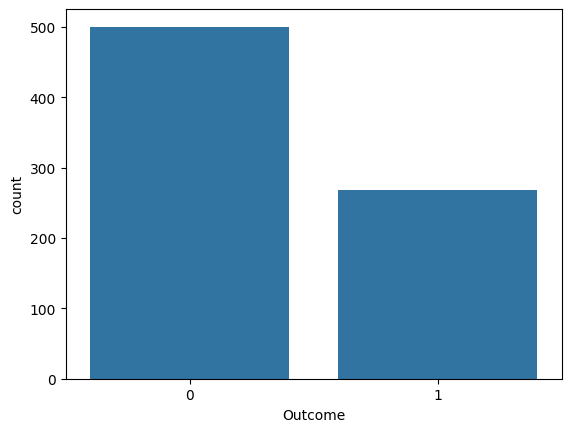

In [ ]:

import seaborn as sns
sns.countplot(x='Outcome',data=data)


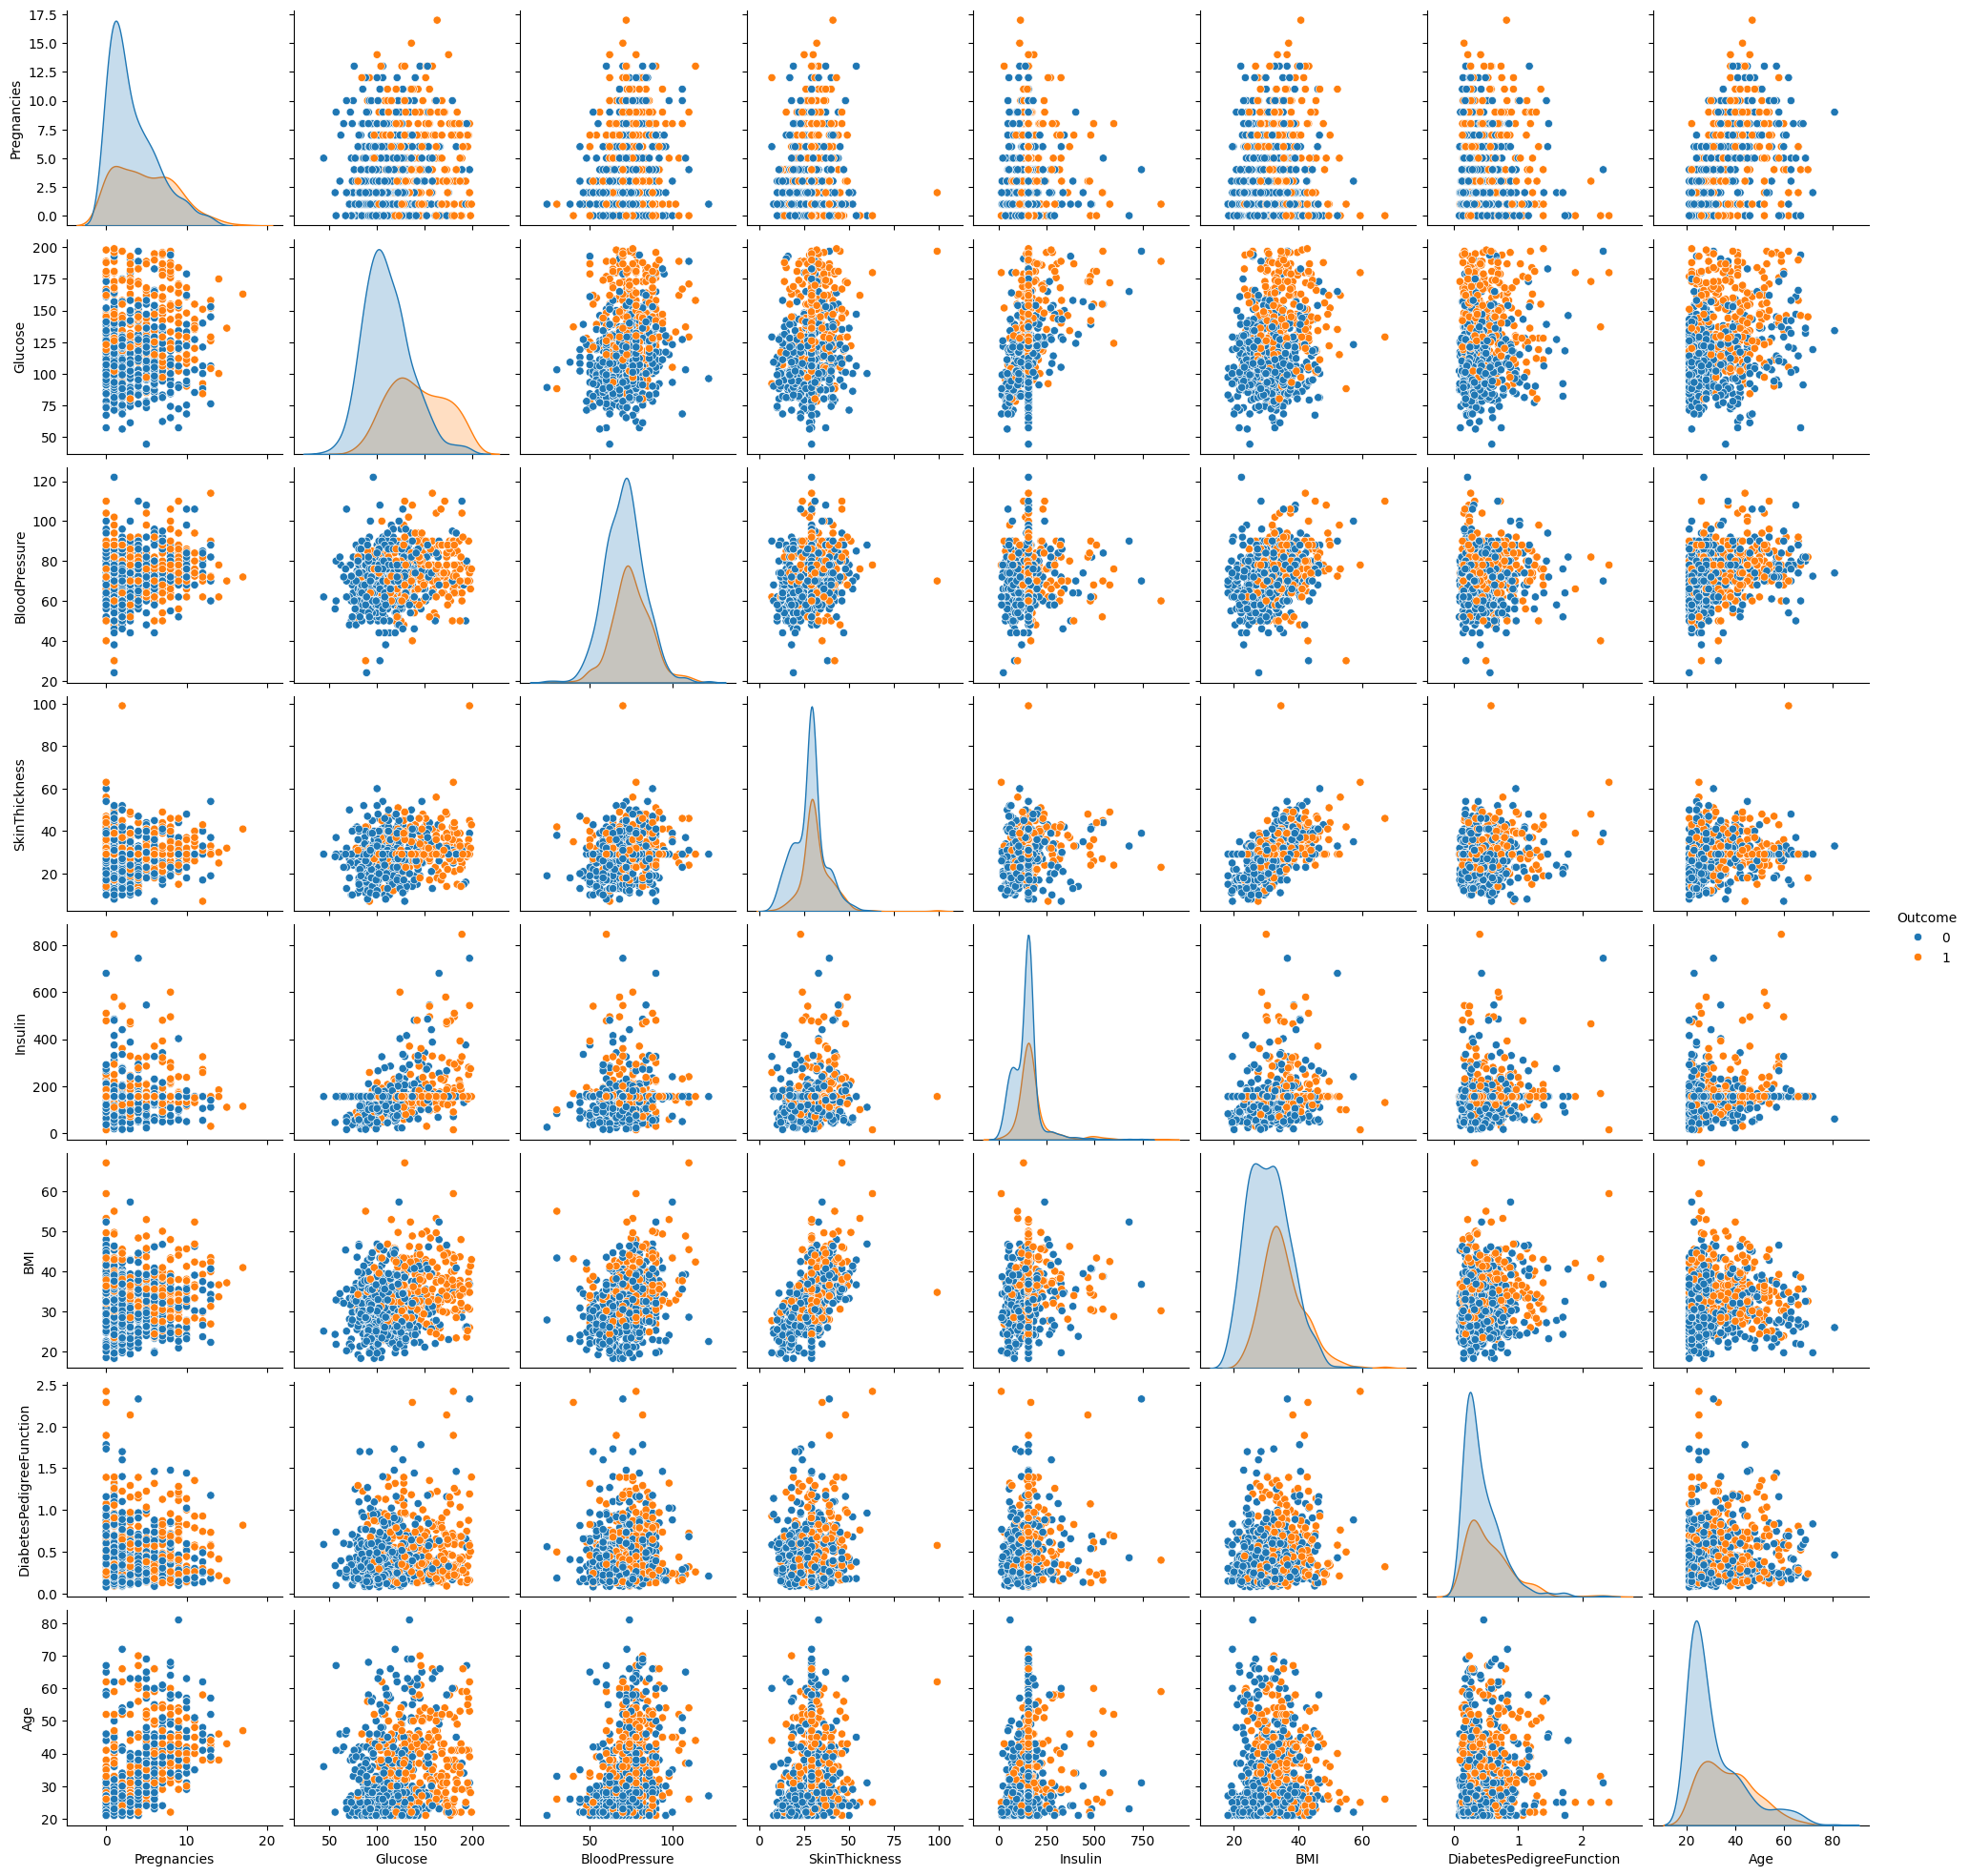

In [ ]:
# prompt: parplot

sns.pairplot(data, hue='Outcome')
plt.show()


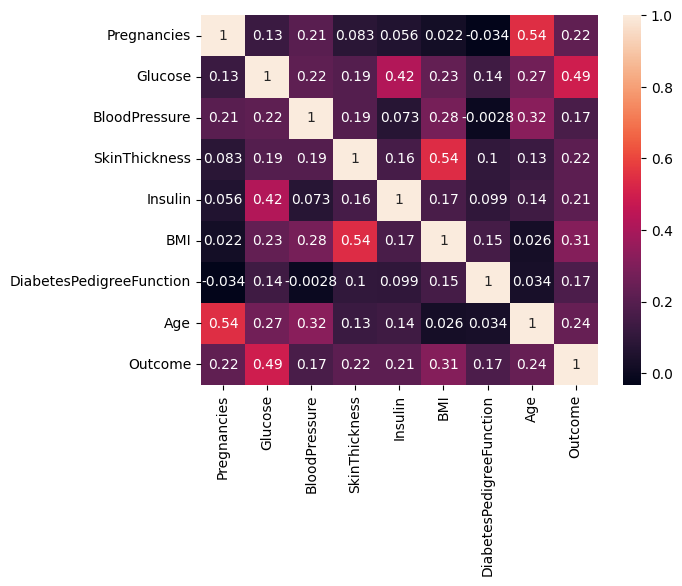

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction'] # Capitalize column names
X = data[feature_cols] # Features
y = data.Outcome # Target variable

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [ ]:
!pip install numpy
import numpy as np

clf.predict([[2., 2.]])
np.array([1]) # Use np.array() to create a NumPy array

array([1])

In [ ]:
# prompt: load data

# Assuming the data is in a CSV file named 'diabetes.csv' in the current directory
data = pd.read_csv('diabetes.csv')


In [ ]:
from sklearn import tree

# Assuming 'data' is your DataFrame and the features are in all columns except the last one,
# and the target variable is in the last column
X = data.iloc[:, :-1]  # Select all rows and all columns except the last one
y = data.iloc[:, -1]   # Select all rows and only the last column

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.4814998795761079, 0.9705882352941176, 'x[1] <= 127.5\ngini = 0.454\nsamples = 768\nvalue = [500, 268]'),
 Text(0.2096278901734104, 0.9117647058823529, 'x[7] <= 28.5\ngini = 0.313\nsamples = 485\nvalue = [391, 94]'),
 Text(0.09609826589595376, 0.8529411764705882, 'x[5] <= 45.4\ngini = 0.155\nsamples = 271\nvalue = [248, 23]'),
 Text(0.0640655105973025, 0.7941176470588235, 'x[5] <= 30.95\ngini = 0.139\nsamples = 267\nvalue = [247, 20]'),
 Text(0.023121387283236993, 0.7352941176470589, 'x[0] <= 7.0\ngini = 0.028\nsamples = 143\nvalue = [141, 2]'),
 Text(0.015414258188824663, 0.6764705882352942, 'x[6] <= 0.672\ngini = 0.014\nsamples = 142\nvalue = [141, 1]'),
 Text(0.007707129094412331, 0.6176470588235294, 'gini = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(0.023121387283236993, 0.6176470588235294, 'x[6] <= 0.686\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.015414258188824663, 0.5588235294117647, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.030828516377649325, 0

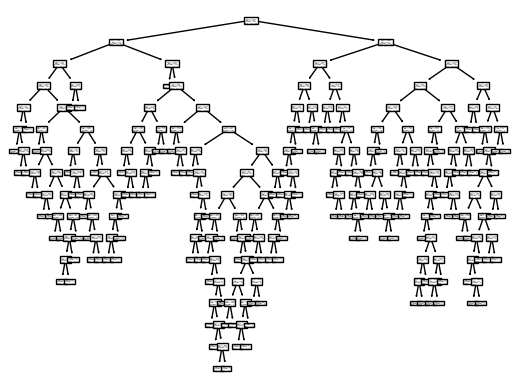

In [ ]:
tree.plot_tree(clf)

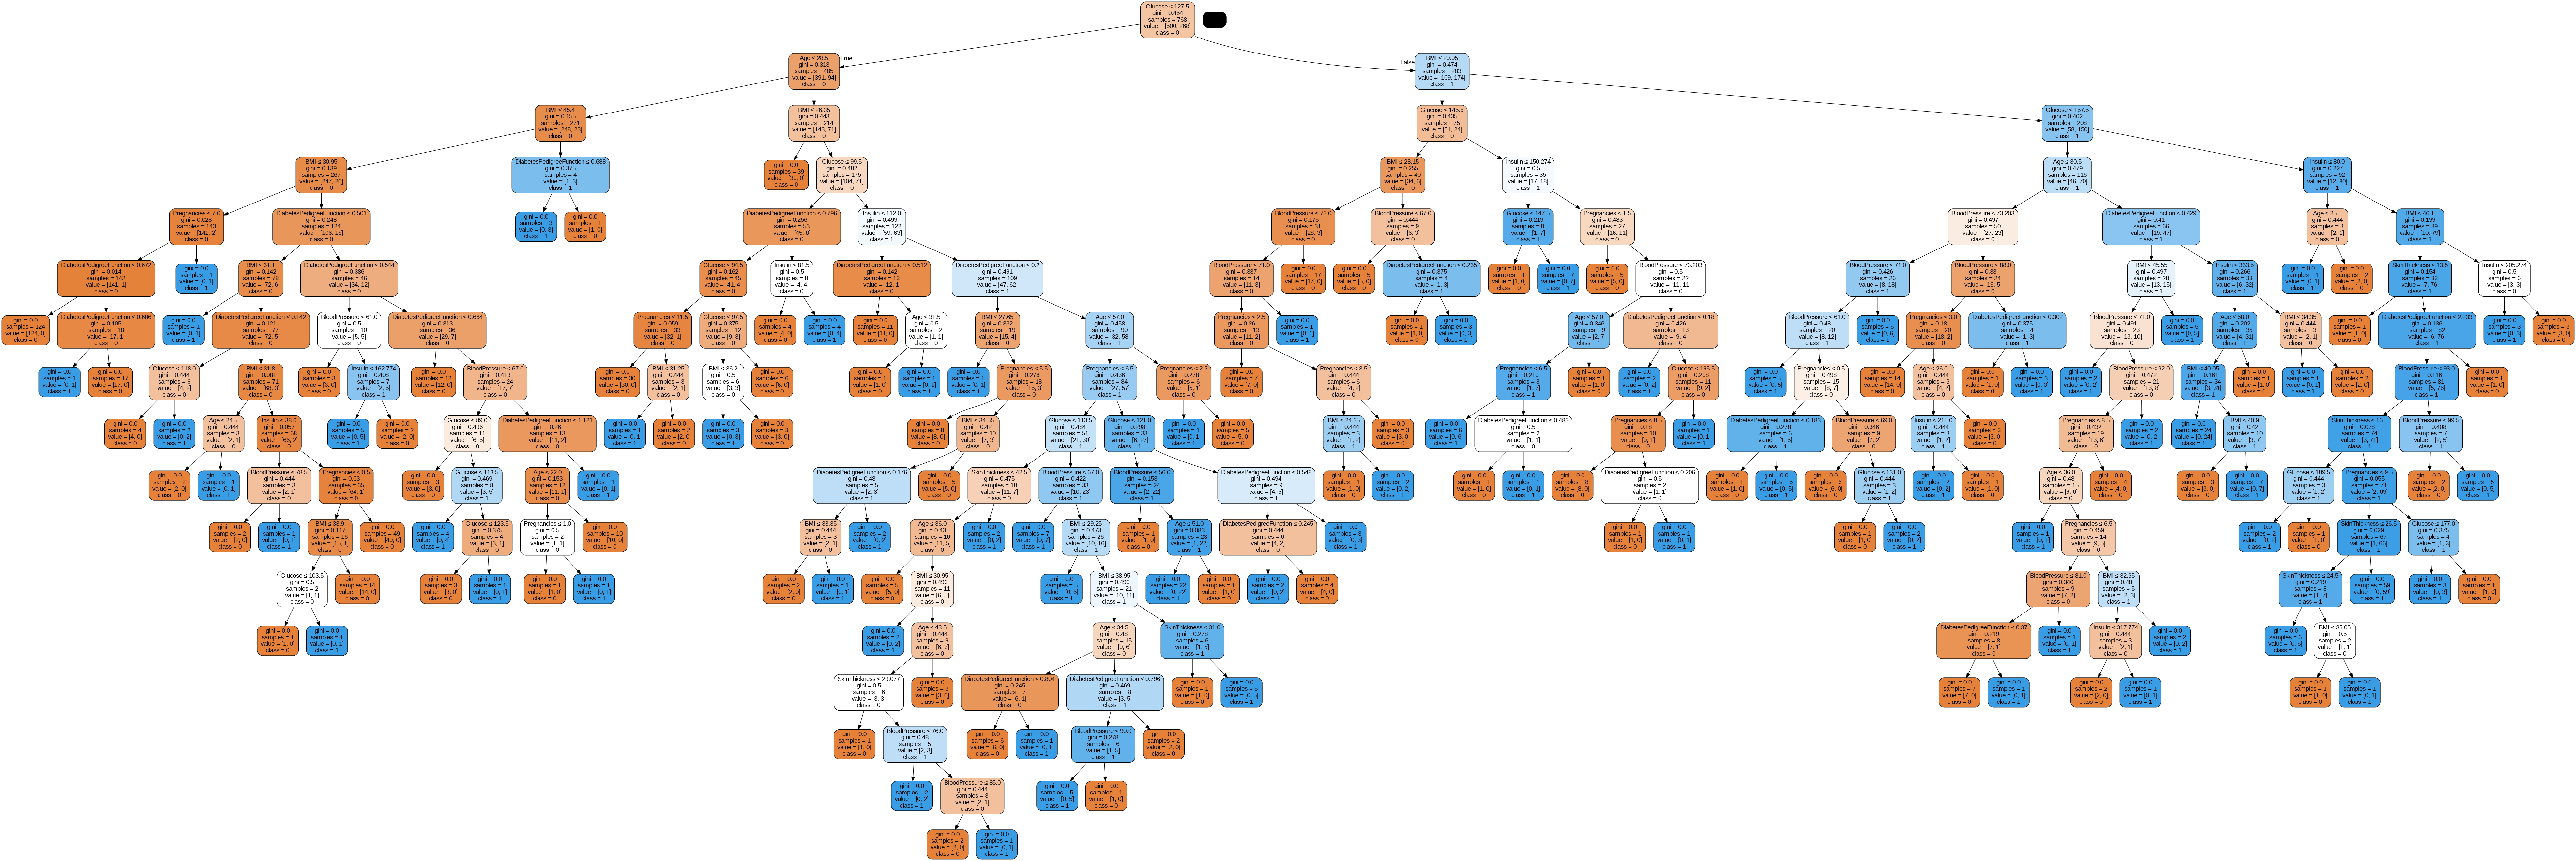

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

# Assuming 'feature_cols' is defined somewhere with the correct feature names
# Ensure that 'feature_cols' has the same number of features as your training data
feature_cols = data.columns[:-1]  # Get feature names from the DataFrame, excluding the target variable

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0','1'])  # Use feature_cols here
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


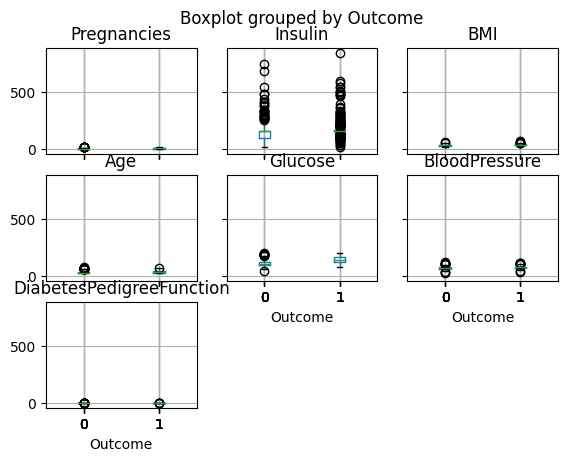

In [ ]:
data.boxplot(by = 'Outcome',column=['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction'])
plt.show()

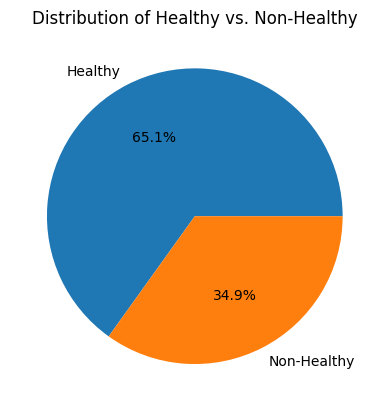

In [ ]:
# Count the number of healthy (Outcome == 0) and non-healthy (Outcome == 1) individuals
outcome_counts = data['Outcome'].value_counts()

# Create labels for the pie chart
labels = ['Healthy', 'Non-Healthy']

# Create the pie chart
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Healthy vs. Non-Healthy')
plt.show()

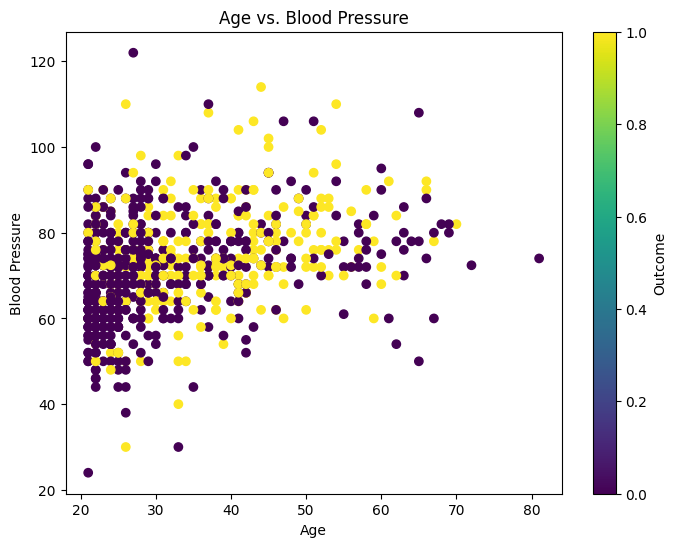

In [ ]:

# Create a scatter plot of Age vs. BloodPressure
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
# Use plt.scatter to create a scatter plot
plt.scatter(data['Age'], data['BloodPressure'], c=data['Outcome'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs. Blood Pressure')
plt.colorbar(label='Outcome')  # Add a colorbar to show Outcome
plt.show()

In [ ]:
#Splitting Data
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7359307359307359


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7662337662337663
